In [20]:
import os
import pandas as pd
from enum import Enum
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

INSTANCES = 10
MIN_SIZE = 8
SIZES = 5

class Symmetry(Enum):
    SYMMETRIC = "Symetryczne"
    ASYMMETRIC = "Asymetryczne"

class Density(Enum):
    PERCENT_30 = "30%"
    PERCENT_60 = "60%"
    PERCENT_100 = "100%"

In [21]:
#Find all files in dir_path directory
dir_path = "../build/Proj_2/Wyniki"
file_list = os.listdir(dir_path)
print(file_list)

['finalresoult.csv']


In [22]:
#Read data from all .csv
data_frames = {}
for file_name in file_list:
    file_path = "../build/Proj_2/Wyniki/"+file_name
    data_frame = pd.read_csv(file_path)
    data_frames[file_name] = data_frame

In [23]:
#Genrate base table and column list
columns = pd.MultiIndex.from_tuples(
    [
        ("","Rozmiar/Gęstość"),
        (Symmetry.SYMMETRIC.value, Density.PERCENT_30.value),
        (Symmetry.SYMMETRIC.value, Density.PERCENT_60.value),
        (Symmetry.SYMMETRIC.value, Density.PERCENT_100.value),
        (Symmetry.ASYMMETRIC.value, Density.PERCENT_30.value),
        (Symmetry.ASYMMETRIC.value, Density.PERCENT_60.value),
        (Symmetry.ASYMMETRIC.value, Density.PERCENT_100.value)
    ],
    )
base_table = pd.DataFrame(columns=columns)
index_table = [0]*SIZES
for i in range(SIZES):
    empty_row = [None] * len(base_table.columns)
    base_table.loc[len(base_table)] = empty_row 
    base_table.at[len(base_table) - 1, ("", "Rozmiar/Gęstość")] = i + MIN_SIZE
    index_table[i] = i + MIN_SIZE

i = 0
j = 0
column_list = [
    (Symmetry.SYMMETRIC.value, Density.PERCENT_30.value),
    (Symmetry.SYMMETRIC.value, Density.PERCENT_60.value),
    (Symmetry.SYMMETRIC.value, Density.PERCENT_100.value),
    (Symmetry.ASYMMETRIC.value, Density.PERCENT_30.value),
    (Symmetry.ASYMMETRIC.value, Density.PERCENT_60.value),
    (Symmetry.ASYMMETRIC.value, Density.PERCENT_100.value)
]

In [24]:
def save_to_latex(saved_table,file_name,caption,label):
    f = open("./src/tables/"+file_name, "a",encoding="utf-8")
    latex_output = saved_table.to_latex(  index=False,
                                    column_format="rrrrrrr",
                                    caption=caption,
                                    label="tab:"+label,
                                    multicolumn_format="c")
    latex_output = latex_output.replace(r"\begin{table}", r"\begin{table}[ht]")
    latex_output = latex_output.replace("Rozmiar Instancji/\n","Rozmiar Instancji/\\linebreak")
    latex_output = latex_output.replace("\\begin{tabular}{rrrrrrr}\n","\\centering\n\\begin{tabular}{rrrrrrr}\n")
    latex_output = latex_output.replace("\\caption{"+caption+"}\n","")
    latex_output = latex_output.replace("\\label{tab:"+label+"}\n","")
    latex_output = latex_output.replace("\\end{tabular}","\\end{tabular}\n\\caption{"+caption+"}\n"+"\\label{tab:"+label+"}")
    latex_output = latex_output.replace("%", r"\%")
    f.write(latex_output)
    f.close()

In [25]:
#Create Mean execute time tables
time_frames = {}
for file_name in file_list:
    data_frame = data_frames[file_name]
    file_name_no_ext = file_name.replace(".csv", "")
    with open("./src/tables/"+file_name_no_ext+".tex", 'w') as file:
        pass    
    start = 1
    end = 1
    val_table = base_table.copy()
    res_table = base_table.copy()
    err_table = base_table.copy()
    data_frame["Blad wzgledny (liczbowo)"] = pd.to_numeric(data_frame["Blad wzgledny (liczbowo)"], errors='coerce')
    j = 0
    for start in range(1, (len(data_frame) +1)- INSTANCES, INSTANCES+1):
        end = start+INSTANCES
        selected_data = data_frame.iloc[start:end]
        best_resoult = selected_data["Otrzymany wynik"].min()
        average_value = selected_data["Czas wykonania"].mean()
        if best_resoult == "0":
            val_table.at[i, column_list[j]] = average_value/1000000000
            res_table.at[i, column_list[j]] = "N/A"
            err_table.at[i, column_list[j]] = "N/A"
        else:
            average_error = selected_data["Blad wzgledny (liczbowo)"].mean()
            val_table.at[i, column_list[j]] = average_value/1000000000
            res_table.at[i, column_list[j]] = int(best_resoult)
            err_table.at[i, column_list[j]] = round(average_error, 2)
        i += 1
        if i >= SIZES:
            i = 0
            j += 1
            if j>SIZES:
                break
    time_frames[file_name] = val_table
    pd.options.display.float_format = '{:.6f}'.format
    save_to_latex(val_table,file_name_no_ext+".tex","Czasy wykonania algorytmu dla macierzy symetrycznych i niesymetrycznych","mean_time_"+file_name_no_ext)
    print(val_table.to_string(index=False))
    save_to_latex(res_table,file_name_no_ext+".tex","Wyniki algorytmu dla macierzy symetrycznych i niesymetrycznych","resoult_"+file_name_no_ext)
    print(res_table.to_string(index=False))
    pd.options.display.float_format = '{:.2f}'.format
    save_to_latex(err_table,file_name_no_ext+".tex","Błędy w wynikach algorytmu dla macierzy symetrycznych i niesymetrycznych","error_"+file_name_no_ext)
    print(err_table.to_string(index=False))

                Symetryczne           Asymetryczne          
Rozmiar/Gęstość         30%  60% 100%          30%  60% 100%
              8    0.018262 None None         None None None
              9    0.002919 None None         None None None
             10    0.003057 None None         None None None
             11        None None None         None None None
             12        None None None         None None None
                Symetryczne           Asymetryczne          
Rozmiar/Gęstość         30%  60% 100%          30%  60% 100%
              8         153 None None         None None None
              9          91 None None         None None None
             10          91 None None         None None None
             11        None None None         None None None
             12        None None None         None None None
                Symetryczne           Asymetryczne          
Rozmiar/Gęstość         30%  60% 100%          30%  60% 100%
              8        0

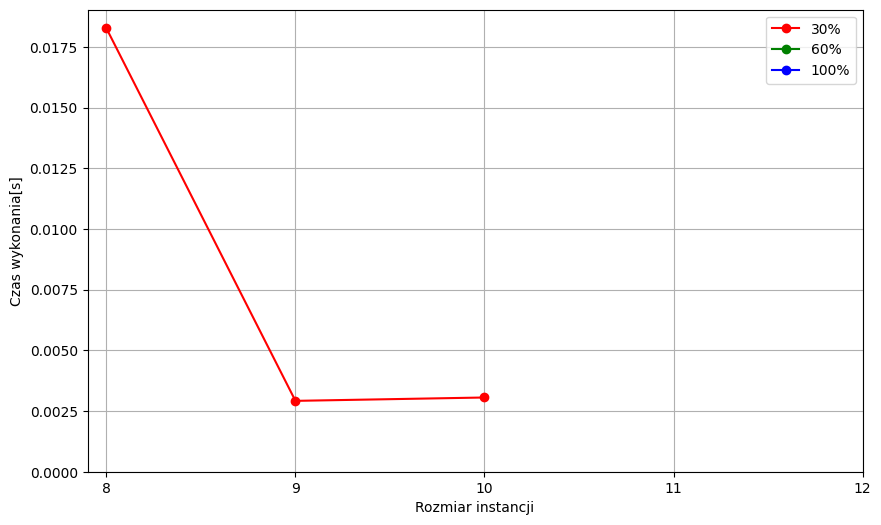

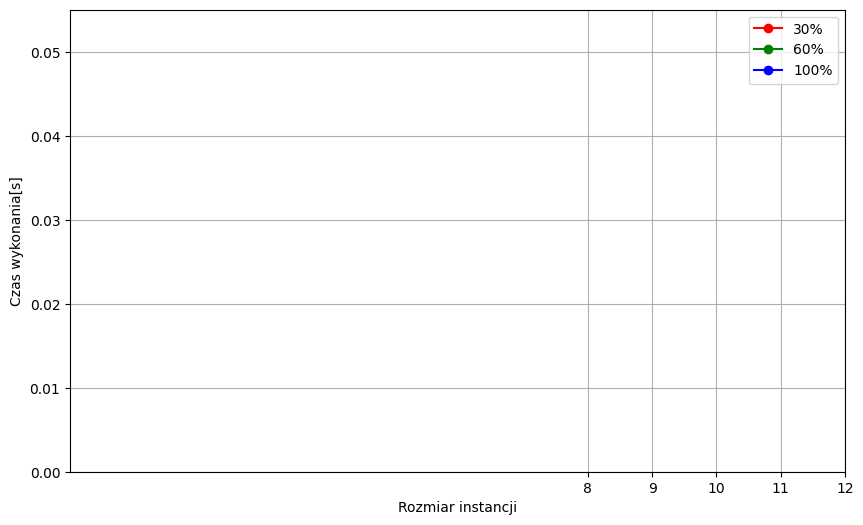

In [26]:
#Create Mean execute time plots
for file_name in file_list:
    data_frame = time_frames[file_name]
    file_name = file_name.replace(".csv", "")
    plt.figure(figsize=(10, 6))
    plt.plot(index_table,data_frame[column_list[0]], label="30%", marker='o',color='red')
    plt.plot(index_table,data_frame[column_list[1]], label="60%", marker='o',color='green')
    plt.plot(index_table,data_frame[column_list[2]], label="100%", marker='o',color='blue')
    plt.ylabel("Czas wykonania[s]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji")
    plt.xticks(index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/sym"+file_name+".png")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(index_table,data_frame[column_list[3]], label="30%", marker='o',color='red')
    plt.plot(index_table,data_frame[column_list[4]], label="60%", marker='o',color='green')
    plt.plot(index_table,data_frame[column_list[5]], label="100%", marker='o',color='blue')
    plt.ylabel("Czas wykonania[s]")
    plt.ylim(bottom=0)
    plt.xlabel("Rozmiar instancji")
    plt.xticks(index_table)
    plt.legend()
    plt.grid(True)
    plt.savefig("./src/plots/asym"+file_name+".png")
    plt.show()

In [27]:
#Print whole csv
for name, df in data_frames.items():
    print(f"Data from {name}:")
    print(df.to_string())

Data from finalresoult.csv:
     Optymalny wynik Optymalna scieżka Otrzymany wynik        Otrzymana scieżka  Czas wykonania  Blad bezwzgledny  Blad wzgledny (liczbowo) Blad wzgledny (procentowo)
0   \Dane\Adam11.txt        tabuSearch           false                      NaN             NaN               NaN                       NaN                        NaN
1                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18244500.00              4.00                      0.03                  2.684564%
2                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     17726200.00              4.00                      0.03                  2.684564%
3                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18014500.00              4.00                      0.03                  2.684564%
4                149               NaN             153  11-2-3-7-8-1-5-4-10-9-6     18187300.00              4.00                      0.